In [34]:
from skforecast.foundational import FoundationalModels
from skforecast.plot import plot_prediction_intervals
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [35]:
air_passengers = np.array([
    112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118,
    115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140,
    145, 150, 178, 163, 172, 178, 199, 199, 184, 162, 146, 166,
    171, 180, 193, 181, 183, 218, 230, 242, 209, 191, 172, 194,
    196, 196, 236, 235, 229, 243, 264, 272, 237, 211, 180, 201,
    204, 188, 235, 227, 234, 264, 302, 293, 259, 229, 203, 229,
    242, 233, 267, 269, 270, 315, 364, 347, 312, 274, 237, 278,
    284, 277, 317, 313, 318, 374, 413, 405, 355, 306, 271, 306,
    315, 301, 356, 348, 355, 422, 465, 467, 404, 347, 305, 336,
    340, 318, 362, 348, 363, 435, 491, 505, 404, 359, 310, 337,
    360, 342, 406, 396, 420, 472, 548, 559, 463, 407, 362, 405,
    417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432
], dtype=np.float64)

dates = pd.date_range(start='1949-01', periods=len(air_passengers), freq='MS')

data = pd.Series(air_passengers, index=dates, name = "y")


In [36]:

model = FoundationalModels(model="amazon/chronos-t5-small", num_samples=20)
model.fit(data)
pred = model.forecast(h=12)
pred_q = model.forecast(h=12, quantiles=[0.05, 0.5, 0.95])

# adapt to skforecast plot format
pred_df = pred_q.rename(
    columns={"q_0.5": "pred", "q_0.05": "lower_bound", "q_0.95": "upper_bound"}
)

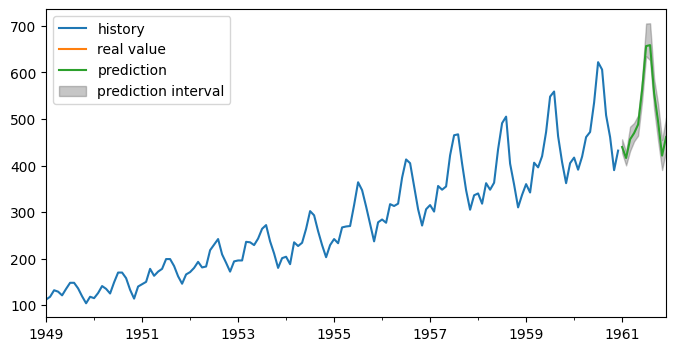

In [37]:
y_plot = data.reindex(data.index.union(pred_df.index))

fig, ax = plt.subplots(figsize=(8, 4))
data.plot(ax=ax, label="history")

plot_prediction_intervals(
    predictions=pred_df,
    y_true=y_plot,
    target_variable="y",
    ax=ax,
)
ax.legend()
